## Validation of Land Cover CNN Classification

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.io import loadmat

from sklearn.preprocessing import minmax_scale

from tensorflow.keras.models import  load_model
from tensorflow.keras.utils import to_categorical

### Load data:

In [31]:
data = loadmat('Salinas_corrected.mat')['salinas_corrected']     #figures
gt = loadmat('Salinas_gt.mat')['salinas_gt']                     #ground truth

### DataFrame:

In [32]:
df = pd.DataFrame(data.reshape(data.shape[0]*data.shape[1], -1)) #reshape (512*217)
df.columns = [f'band{i}' for i in range(1, df.shape[-1]+1)]      #rename columns
df['class'] = gt.ravel()                                         #concatenate classes

In [37]:
t_df = df[df['class']!=0]                   #delete class 0
X = t_df.drop(['class'], axis=1)            #x: data 
y = to_categorical(t_df['class'])           #y: target 

X_scaled = minmax_scale(X, axis = 0);       #MinMax scale

columns = X.columns
sca_df = pd.DataFrame(data=X_scaled, columns=columns) #scaled df 

index = X.index
classes = np.asarray(t_df['class'])

sca_df['pos']=index
sca_df['class']=classes

### Ground Truth:

Fig. Ground Truth:


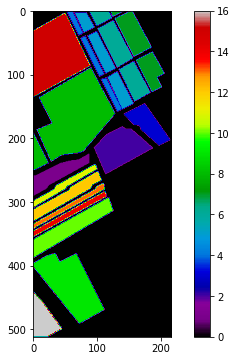

In [38]:
plt.figure(figsize=(8, 6))
plt.imshow(gt, cmap='nipy_spectral')
plt.colorbar()
print('Fig. Ground Truth:')
plt.show()

## Model Prediction

In [39]:
model = load_model("Salinas_Model.h5")

In [46]:
x_pos = 40    #25
y_pos = 110   #100
pos = y_pos*217 + x_pos

pixel_df = sca_df[sca_df['pos']==pos]                        #pixel selection
pixel = np.asarray(pixel_df.drop(['class','pos'], axis=1))
pixel = pixel.reshape(-1, 204, 1)                             #CNN input reshape

y_pred = np.argmax(model.predict(pixel), axis=1)              #pixel classification

print('Pixel Position:', pixel_df['pos'].values,'True Class:',pixel_df['class'].values,'Prediction:',y_pred[0])

Pixel Position: [23910] True Class: [15] Prediction: 15
